# <center>Review y analisis de dataset Amazon
-----
#### <center> Por Diego Silva M.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D ##para visualizar el cluster en 3D
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
import boto3

import warnings

# Ocultar warnings específicos
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

In [63]:
df = pd.read_csv("amazon.csv")

In [64]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [65]:
# Información básica sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [66]:
# Estadísticas descriptivas
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

In [67]:
# Verificar valores nulos
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [68]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [69]:
#creamos una copia del df con las tablas que hemos quitado
df_copy= df.copy()

In [70]:
# Eliminar filas con valores nulos
df_copy = df_copy.dropna()

In [71]:
# Eliminar columnas específicas
columns_to_drop = ['product_id', 'user_id', 'review_id', 'img_link', 'product_link']
df_copy = df_copy.drop(columns=columns_to_drop)

In [72]:
df_copy.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_name', 'review_title', 'review_content'],
      dtype='object')

In [73]:
# Función para limpiar los valores monetarios
def clean_currency(value):
    if pd.isna(value):
        return value
    # Eliminar símbolos de moneda y separadores de miles
    value = value.replace('₹', '').replace(',', '')
    # Convertir a número
    return pd.to_numeric(value, errors='coerce')

In [74]:
# Aplicar cambio de moneda rupia india (₹)
df_copy['discounted_price'] = df_copy['discounted_price'].apply(clean_currency)
df_copy['actual_price'] = df_copy['actual_price'].apply(clean_currency)
df_copy['rating_count'] = df_copy['rating_count'].apply(clean_currency)


In [75]:
# Función para limpiar el porcentaje de descuento
def clean_percentage(value):
    if pd.isna(value):
        return value
    # Eliminar el símbolo '%' y convertir a número
    value = value.replace('%', '')
    return pd.to_numeric(value, errors='coerce') / 100  # Convertir a decimal

# Aplicar la función a la columna de porcentaje de descuento
df_copy['discount_percentage'] = df_copy['discount_percentage'].apply(clean_percentage)

In [76]:
df_copy.head(5)

product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage rating  rating_count  \
0        1099.0                 0.64    4.2         24269   
1         349.0                 0.43    4.0         43994   
2        1899.0                 0.90    3.9          7928   
3         699.0                 0.53    4.2         94363   
4         399.0                 0.61    4.2         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  
0  Looks durable Charging is fine tooNo complains...  
1  I ordered this cable to connect my phone to An...  
2  Not quite durable and sturdy,https://m.media-a...  
3  Good product,long wire,Charges good,Nice,I bou...  
4  Bought this instead of original apple, does th...

## Analisis de sentimientos de productos

In [77]:
# Función para obtener el sentimiento del texto
def get_sentiment(text):
    if pd.isna(text):
        return None
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicar la función a la columna
df_copy['sentiment'] = df_copy['about_product'].apply(get_sentiment)

print(df_copy[['about_product', 'sentiment']].head())

                                       about_product  sentiment
0  High Compatibility : Compatible With iPhone 12...   0.217738
1  Compatible with all Type C enabled devices, be...   0.163757
2  【 Fast Charger& Data Sync】-With built-in safet...   0.170901
3  The boAt Deuce USB 300 2 in 1 cable is compati...   0.230556
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   0.279762


In [78]:
# Filtrar productos con sentimiento muy positivo (desde 0.5 se consiguen mas datos dado que 0.5 corresponde a sentimientos ++)
positive_reviews = df_copy[df_copy['sentiment'] > 0.6]

print("Productos con sentimiento muy positivo:")
print(positive_reviews[['product_name', 'about_product', 'sentiment']].head())

Productos con sentimiento muy positivo:
                                          product_name  \
343  SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...   
353  SanDisk Ultra® microSDXC™ UHS-I Card, 128GB, 1...   
507  SanDisk Ultra® microSDXC™ UHS-I Card, 256GB, 1...   
593  SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...   
748  JBL Commercial CSLM20B Auxiliary Omnidirection...   

                                         about_product  sentiment  
343  Ideal storage for Android smartphones and tabl...      0.625  
353  Ideal storage for Android smartphones and tabl...      0.625  
507  Ideal storage for Android smartphones and tabl...      0.625  
593  Ideal storage for Android smartphones and tabl...      0.625  
748  Omnidirectional pickup pattern|3.5mm TRRS jack...      0.700  


In [79]:
# Filtrar productos con sentimiento muy negativo
negative_reviews = df_copy[df_copy['sentiment'] < -0.4]

print("Productos con sentimiento muy negativo:")
print(negative_reviews[['product_name', 'about_product', 'sentiment']].head())

Productos con sentimiento muy negativo:
                                           product_name  \
1083  Butterfly EKN 1.5-Litre Electric Kettle (Silve...   
1164  Homeistic Applience™ Instant Electric Water He...   

                                          about_product  sentiment  
1083  Filter Type : Spout|Auto cut off facility, Dry...  -0.433333  
1164  Save time and energy saving;convenient;economi...  -0.600000  


# Distribución de la polaridad del sentimiento
---

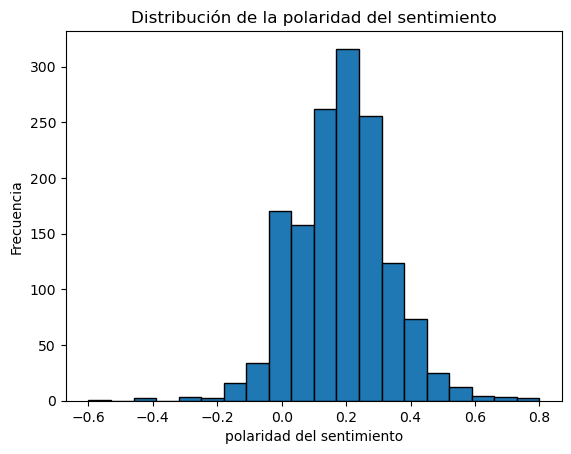

In [80]:
# Visualización de la distribución de la polaridad del sentimiento
plt.hist(df_copy['sentiment'].dropna(), bins=20, edgecolor='black')
plt.xlabel('polaridad del sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de la polaridad del sentimiento')
plt.show()

#### La mayoría de las puntuaciones de sentimiento están cerca del centro (alrededor de 0), lo que sugiere que la mayoría de las reseñas son neutrales, aunque tambien hay un sesgo hacia la polaridad positiva (sobre 0.0), como se ve en las barras más altas en el lado derecho (valores positivos).

# Relación entre sentimiento y calificación
---

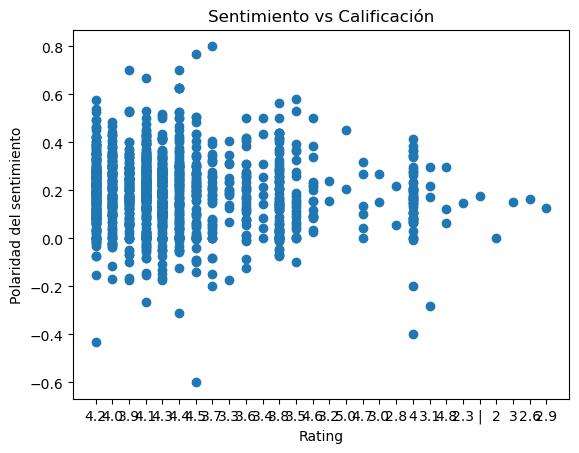

In [81]:
# Relación entre sentimiento y calificación
plt.scatter(df_copy['rating'], df_copy['sentiment'])
plt.xlabel('Rating')
plt.ylabel('Polaridad del sentimiento')
plt.title('Sentimiento vs Calificación')
plt.show()

#### Observamos que hay una amplia distribución de polaridades de sentimiento en todas las calificaciones. A pesar de las diferentes calificaciones, hay una concentración de puntos alrededor del valor cero en el eje de polaridad de sentimiento. Esto indica que muchas reseñas tienen un sentimiento neutral, independientemente de si la calificación es alta o baja

# Clustering de Productos

Con esto permitira **identificar grupos de productos similares basados en sus características**. Esto ayudara a descubrir patrones interesantes y segmentar los productos de manera más efectiva

In [82]:
# corregiremos los datos para que sean numéricos en las columnas que planeamos normalizar
# Verificamos si hay valores no numéricos en las columnas
print(df_copy['sentiment'].apply(lambda x: str(x).isnumeric()).value_counts())
print(df_copy['rating'].apply(lambda x: str(x).isnumeric()).value_counts())
print(df_copy['discount_percentage'].apply(lambda x: str(x).isnumeric()).value_counts())

sentiment
False    1463
Name: count, dtype: int64
rating
False    1409
True       54
Name: count, dtype: int64
discount_percentage
False    1463
Name: count, dtype: int64


In [83]:
# Identificamos las filas con valores no numéricos en las columnas
non_numeric_rows = df_copy[~df_copy['sentiment'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) | 
                            ~df_copy['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) | 
                            ~df_copy['discount_percentage'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

print(non_numeric_rows)

                                           product_name  \
7                MI Usb Type-C Cable Smartphone (Black)   
15    MI Braided USB Type-C Cable for Charging Adapt...   
30    AmazonBasics USB 2.0 - A-Male to A-Female Exte...   
38    OnePlus 126 cm (50 inches) Y Series 4K Ultra H...   
40    AmazonBasics USB 2.0 Cable - A-Male to B-Male ...   
...                                                 ...   
1444  Eureka Forbes Euroclean Paper Vacuum Cleaner D...   
1448  IKEA Milk Frother for Your Milk, Coffee,(Cold ...   
1457  Philips HD9306/06 1.5-Litre Electric Kettle (M...   
1462  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   

                                               category  discounted_price  \
7     Computers&Accessories|Accessories&Peripherals|...             229.0   
15    Computers&Accessories|Accessories&Peripherals|...             349.0   
30    Computers&Accessories|Accessories&Peripherals|...     

In [84]:
# Eliminamos las filas con valores no numéricos
df_copy = df_copy[df_copy['sentiment'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) &
                    df_copy['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) &
                    df_copy['discount_percentage'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convertimos las columnas a tipo float
df_copy['sentiment'] = df_copy['sentiment'].astype(float)
df_copy['rating'] = df_copy['rating'].astype(float)
df_copy['discount_percentage'] = df_copy['discount_percentage'].astype(float)

In [85]:
# Seleccionamos las columnas relevantes
features = df_copy[['sentiment', 'rating', 'discount_percentage']]

# Normalizamos los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.dropna())

# Método del codo para determinar el número óptimo de clusters

Este método se basa en la idea de encontrar un equilibrio entre el número de clusters y la suma de las distancias cuadradas dentro del cluster


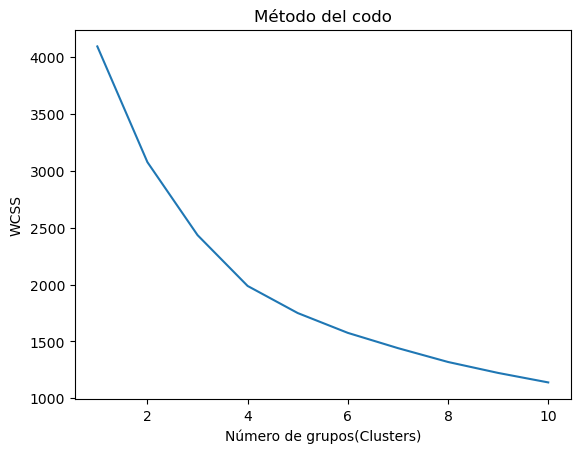

In [86]:
wcss = []  # Suma de los cuadrados dentro del cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de grupos(Clusters)')
plt.ylabel('WCSS')
plt.title('Método del codo')
plt.show()

#### En este analisis se aprecia que la curvatura del codo no es pronunciada como para saber el numero optimo de clasters, por lo que se realizara otro calculo para saber la puntuación de la silueta y determinar el número óptimo de clusters

---
# Método de la Silueta

la puntuación de la silueta es un método sencillo y efectivo para evaluar la calidad del clustering, dando como resultado el valor optimo para el cluster

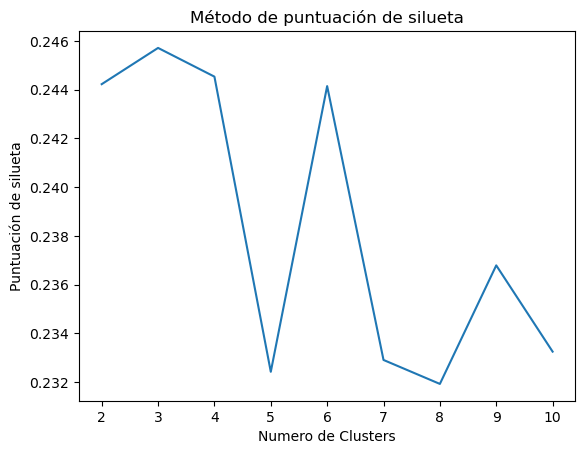

El número óptimo de clusters es: 3


In [87]:
# Calcular la puntuación de la silueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):  # Usualmente no tiene sentido tener un solo cluster
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(score)

# Graficar la puntuación de la silueta
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntuación de silueta')
plt.title('Método de puntuación de silueta')
plt.show()

# Obtener el número óptimo de clusters basado en la mejor puntuación de la silueta
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'El número óptimo de clusters es: {optimal_clusters}')

#### El numero optimmo de clusters segun el metodo de la silueta es de **3**

# Visualizamos el cluster en 2D

In [88]:
# Ajustamos el número de clusters
optimal_clusters = 3
# Aplicar K-means clustering con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)
df_copy['cluster'] = clusters

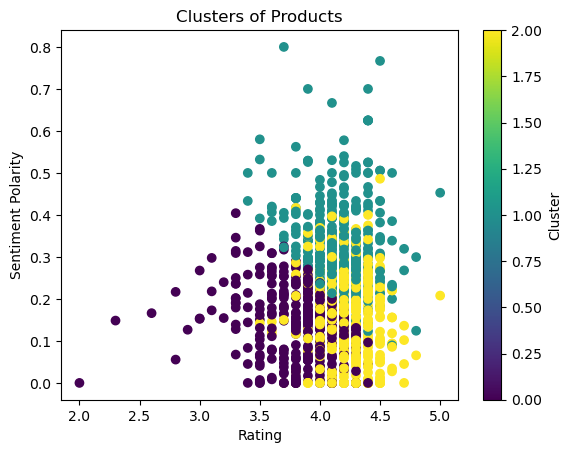

In [89]:
#Visualización en 2D
plt.scatter(df_copy['rating'], df_copy['sentiment'], c=df_copy['cluster'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.title('Clusters of Products')
plt.colorbar(label='Cluster')
plt.show()

# Visualizamos el cluster en 3D

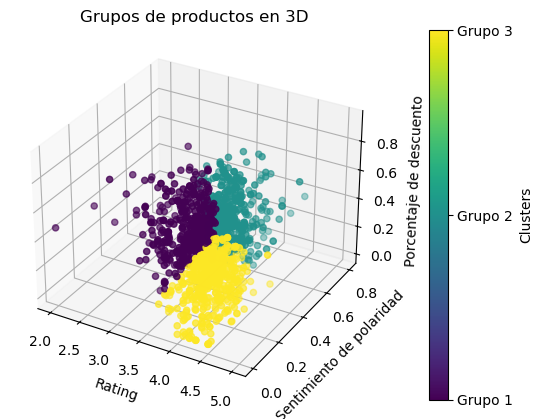

In [90]:
# Creamos el gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
colors = plt.get_cmap('viridis', optimal_clusters)

# Graficamos puntos
scatter = ax.scatter(df_copy['rating'], df_copy['sentiment'], df_copy['discount_percentage'], 
                     c=df_copy['cluster'], cmap='viridis')

# Etiquetas para los ejes
ax.set_xlabel('Rating')
ax.set_ylabel('Sentimiento de polaridad')
ax.set_zlabel('Porcentaje de descuento')
ax.set_title('Grupos de productos en 3D')

# Añadimos una barra de colores para representar los clusters
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Clusters')
cbar.set_ticks(range(optimal_clusters))
cbar.set_ticklabels([f'Grupo {i+1}' for i in range(optimal_clusters)])

plt.show()

---
# Interpretacion de clusters

**Grupo 1 ``(color morado)``** :La dispersión de los puntos en el Cluster Morado indica que los productos dentro de este grupo son más diversos en términos de características y desempeño, ademas este cluster sugieren que alguno de los productos en este cluster no están bien valorados por los clientes

**Grupo 2 ``(color cyan)``** :Tiene una agrupación clara con ratings sobre la media y altos porcentajes de descuento, puede ser una estrategia para atraer a más clientes o liquidar inventario. Aunque estos productos esten en promocion sugieren que los comentarios de estos productos son positivos en general.

**Grupo 3 ``(color amarillo)``** : El bajo porcentaje de descuento sugiere que estos productos no están en promoción. Es posible que estos productos sean populares por su calidad y no necesiten descuentos para atraer compradores. Los productos con altas calificaciones(rating) pero sin grandes descuentos podrían ser de gama alta o premium, lo que podría justificar la ausencia de grandes descuentos.

In [91]:
# Obtener las categorías únicas y convertirlas a lista
#categorias = df_copy['category'].unique().tolist()

# Analisis de graficos

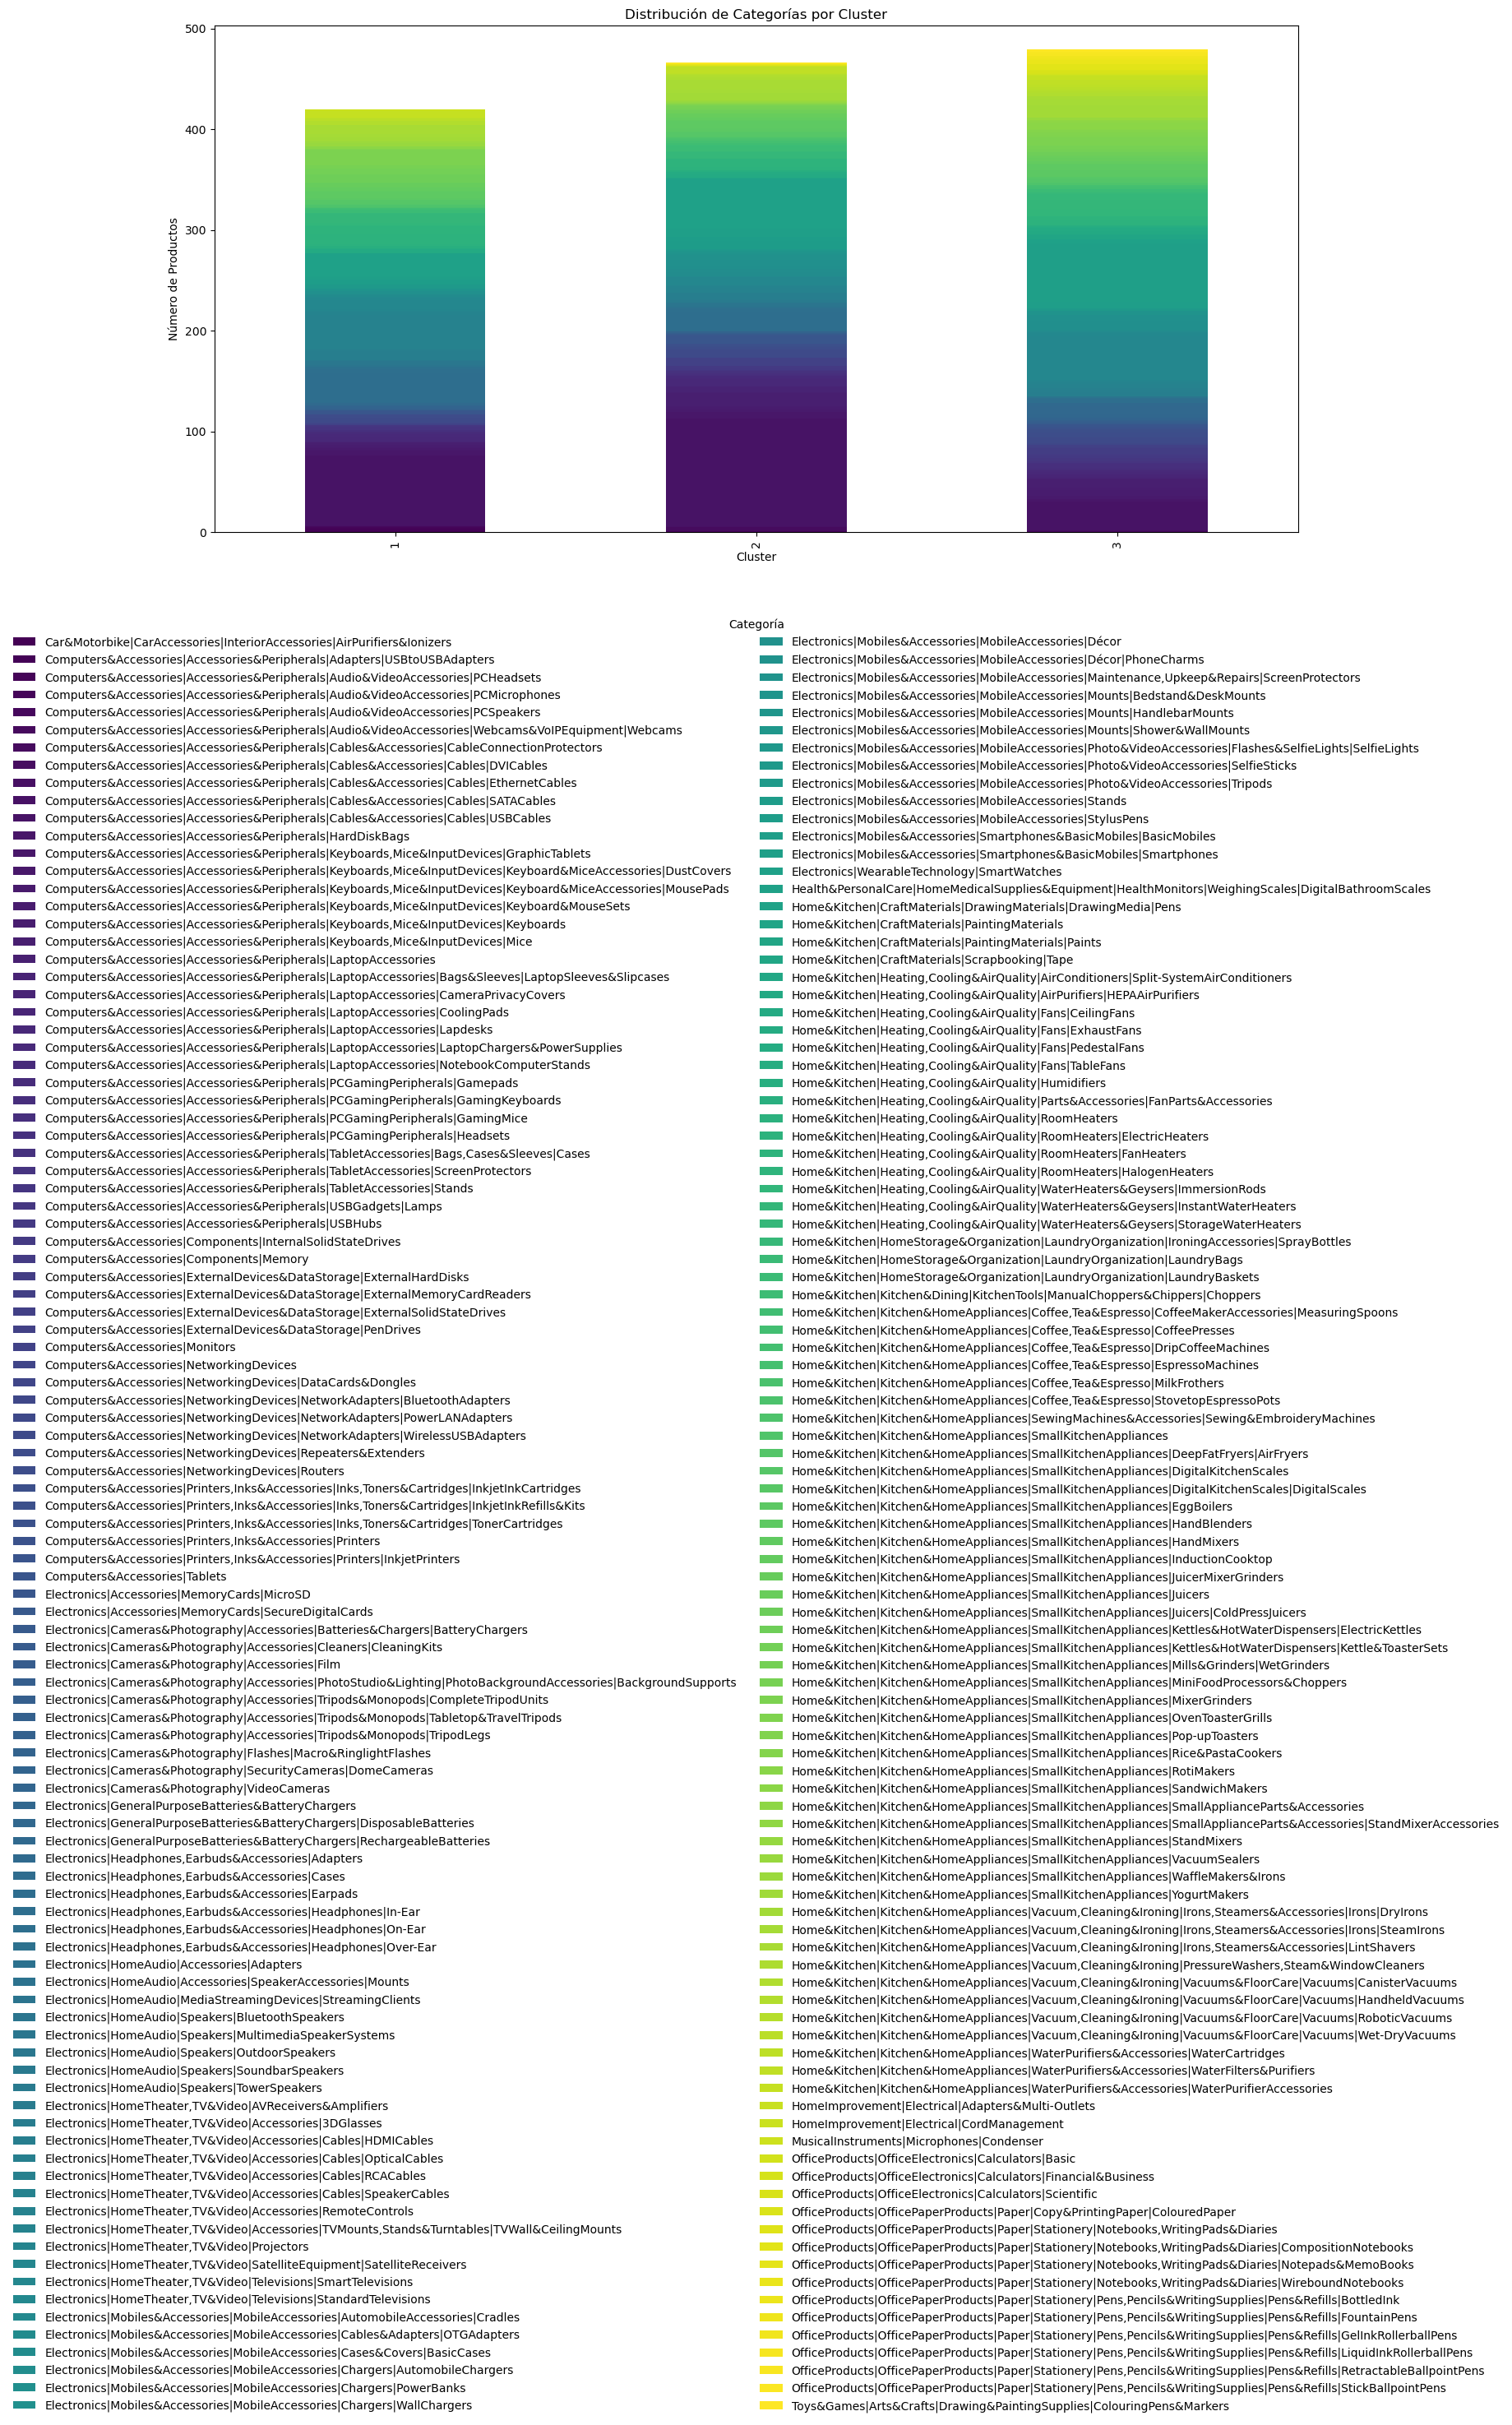

In [92]:
# Incrementamos el índice del cluster en 1, asi se interpreta mejor (1,2,3)
df_copy['cluster'] = df_copy['cluster'] + 1

# Contar el número de productos por categoría y cluster
category_counts = df_copy.groupby(['cluster', 'category']).size().unstack(fill_value=0)

# Creamos el gráfico de barras apiladas
category_counts.plot(kind='bar', stacked=True, figsize=(17, 8), colormap='viridis')
plt.title('Distribución de Categorías por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Productos')
plt.legend(title='Categoría', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2, frameon=False)
plt.show()

C:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


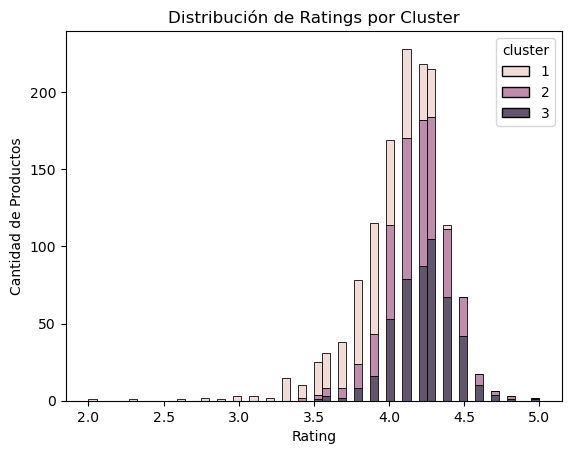

In [93]:
sns.histplot(data=df_copy, x='rating', hue='cluster', multiple='stack')
# Añadir título y etiquetas
plt.title('Distribución de Ratings por Cluster')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Productos')

plt.show()

## Observaciones:
* ``Cluster 1:``
Tiene una mayor concentración de productos con ratings alrededor de 4.0 y 4.5.
La cantidad de productos en este clúster es alta.
* ``Cluster 2:``
Muestra una distribución más uniforme en los ratings, con una ligera disminución hacia 5.0.
La cantidad de productos es moderada.
* ``Cluster 3:``
Tiene una mayor concentración de productos con ratings cercanos a 3.0 y 3.5.
La cantidad de productos es menor que en el Cluster 1.

---

# Mapa de calor: Distribución de categorías por cluster

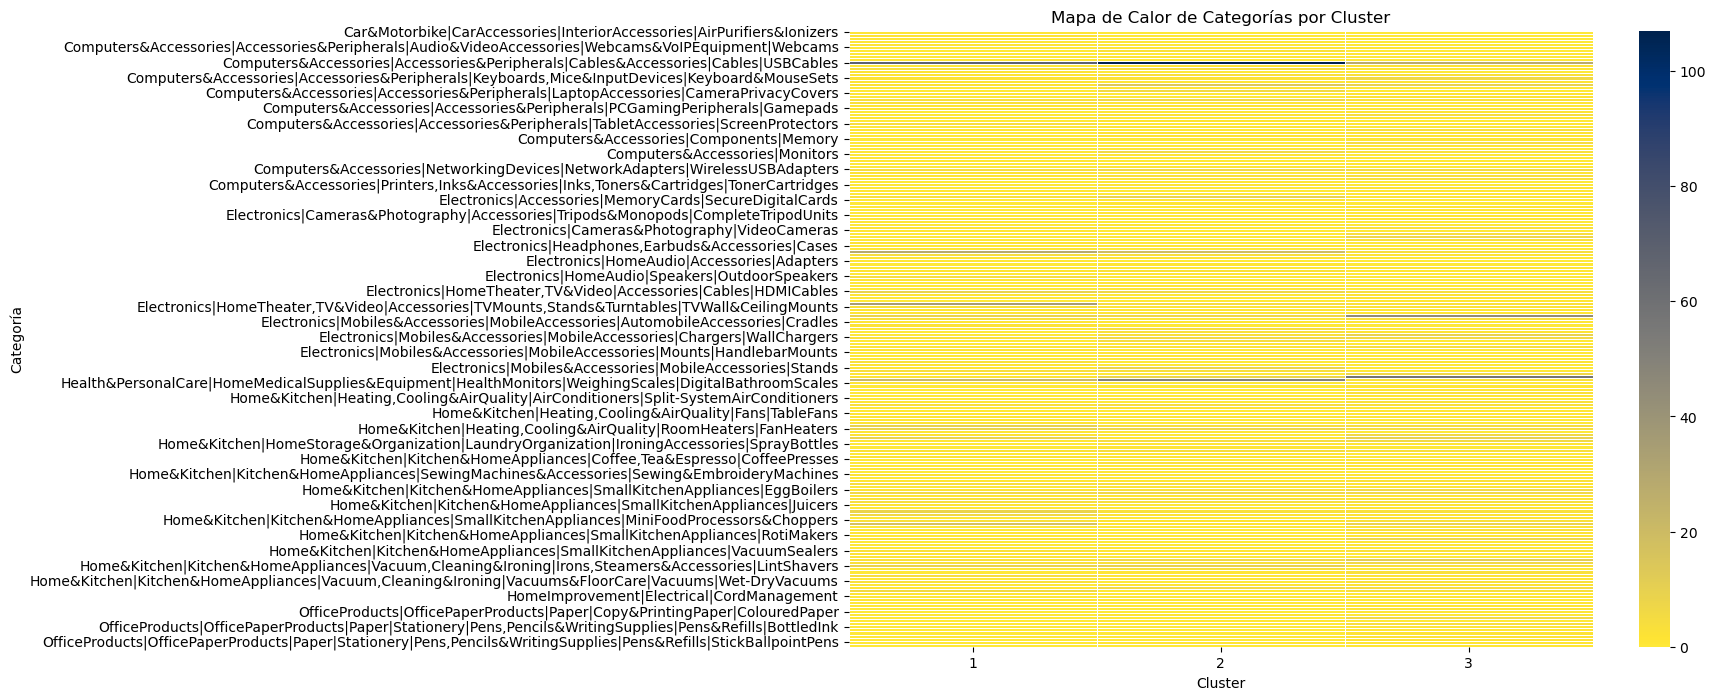

In [94]:
#Mapa de calor vertical
# Creamos un mapa de calor de la distribución de categorías por cluster
#plt.figure(figsize=(12, 8))
#sns.heatmap(category_counts, annot=True, fmt='d', cmap='viridis', linewidths=0.5)
#plt.title('Mapa de Calor de Categorías por Cluster')
#plt.xlabel('Categoría')
#plt.ylabel('Cluster')
#plt.show()
#------------------------------------------------------------------------------------------------
#Mapa de calor Horizontal
# Transponemos el DataFrame para intercambiar los ejes
category_counts_transposed = category_counts.T

# Creamos el mapa de calor horizontal
plt.figure(figsize=(12, 8))
sns.heatmap(category_counts_transposed, annot=False, fmt='d', cmap='cividis_r', linewidths=0.5)
plt.title('Mapa de Calor de Categorías por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Categoría')
plt.show()

# <center>El color oscuro representa valores más altos, y el color claro representa valores más bajos

## Se puede interpretar que :

* El Mapa de calor muestra la categoría **Computers&Accessories|Accessories&Peripherals|** con un color oscuro, esto significa que hay una gran cantidad de productos de esta categoría en ambos clusters, ``Cluster 1`` y ``Cluster 2``. Por lo cual podrían estar especializados en productos de accesorios y periféricos relacionados con computadoras y electronica.

* En el caso del ``cluster 3`` tiene una baja concentración de productos de **Computers&Accessories|Accessories&Peripherals**, lo que puede indicar que los productos de esta categoría no son prominentes en este cluster, o que el cluster se especializa en otras categorías de productos. podría ser que este cluster esté más enfocado en otras categorías de productos, ya que posee mayor intensidad en llas categorias de **Electronics|Mobiles&Accessories|** y **Electronics|HomeTheater.TV&Video|**



## promedio de ratings y descuentos por categoría y cluster

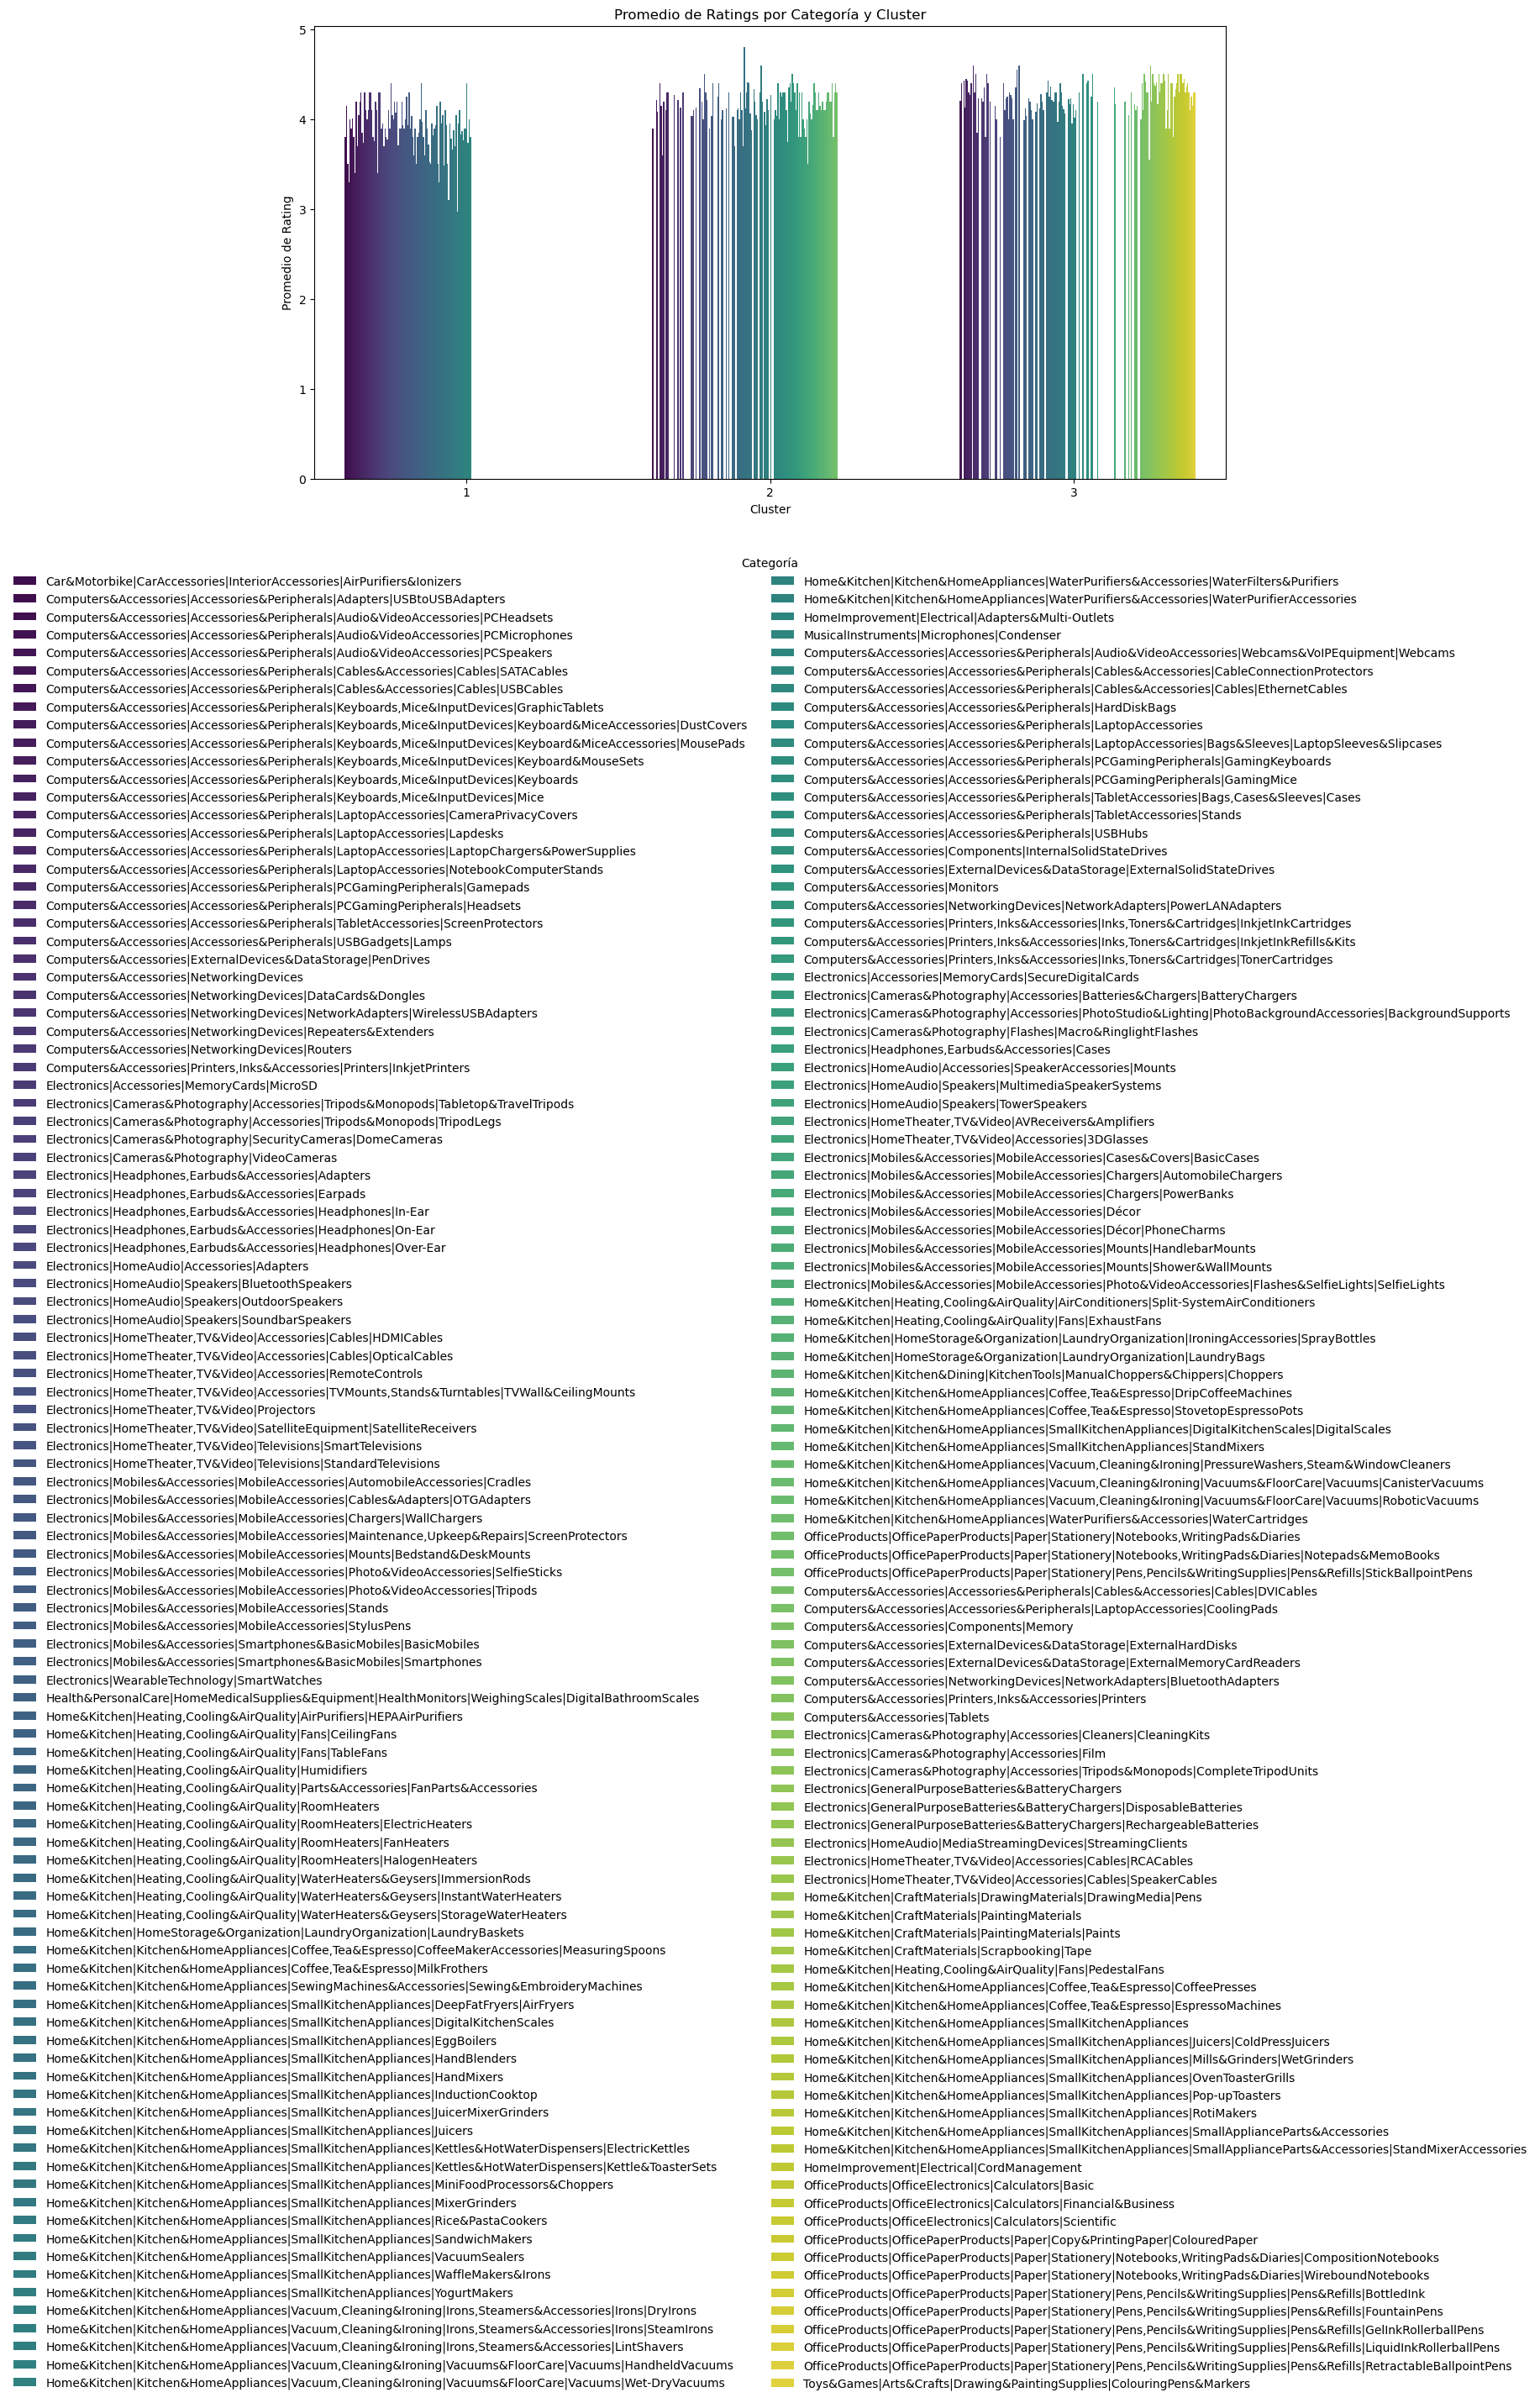

In [95]:
# Obtener el promedio de ratings y descuentos por categoría y cluster
cluster_category_summary = df_copy.groupby(['cluster', 'category']).agg({
    'rating': 'mean',
    'discount_percentage': 'mean'
}).reset_index()

# Crear gráficos de barras para ratings y descuentos
plt.figure(figsize=(14, 7))
sns.barplot(data=cluster_category_summary, x='cluster', y='rating', hue='category', palette='viridis')
plt.title('Promedio de Ratings por Categoría y Cluster')
plt.xlabel('Cluster')
plt.ylabel('Promedio de Rating')
plt.legend(title='Categoría', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2, frameon=False)
plt.show()

## Promedio de Descuentos por Categoría y Cluster

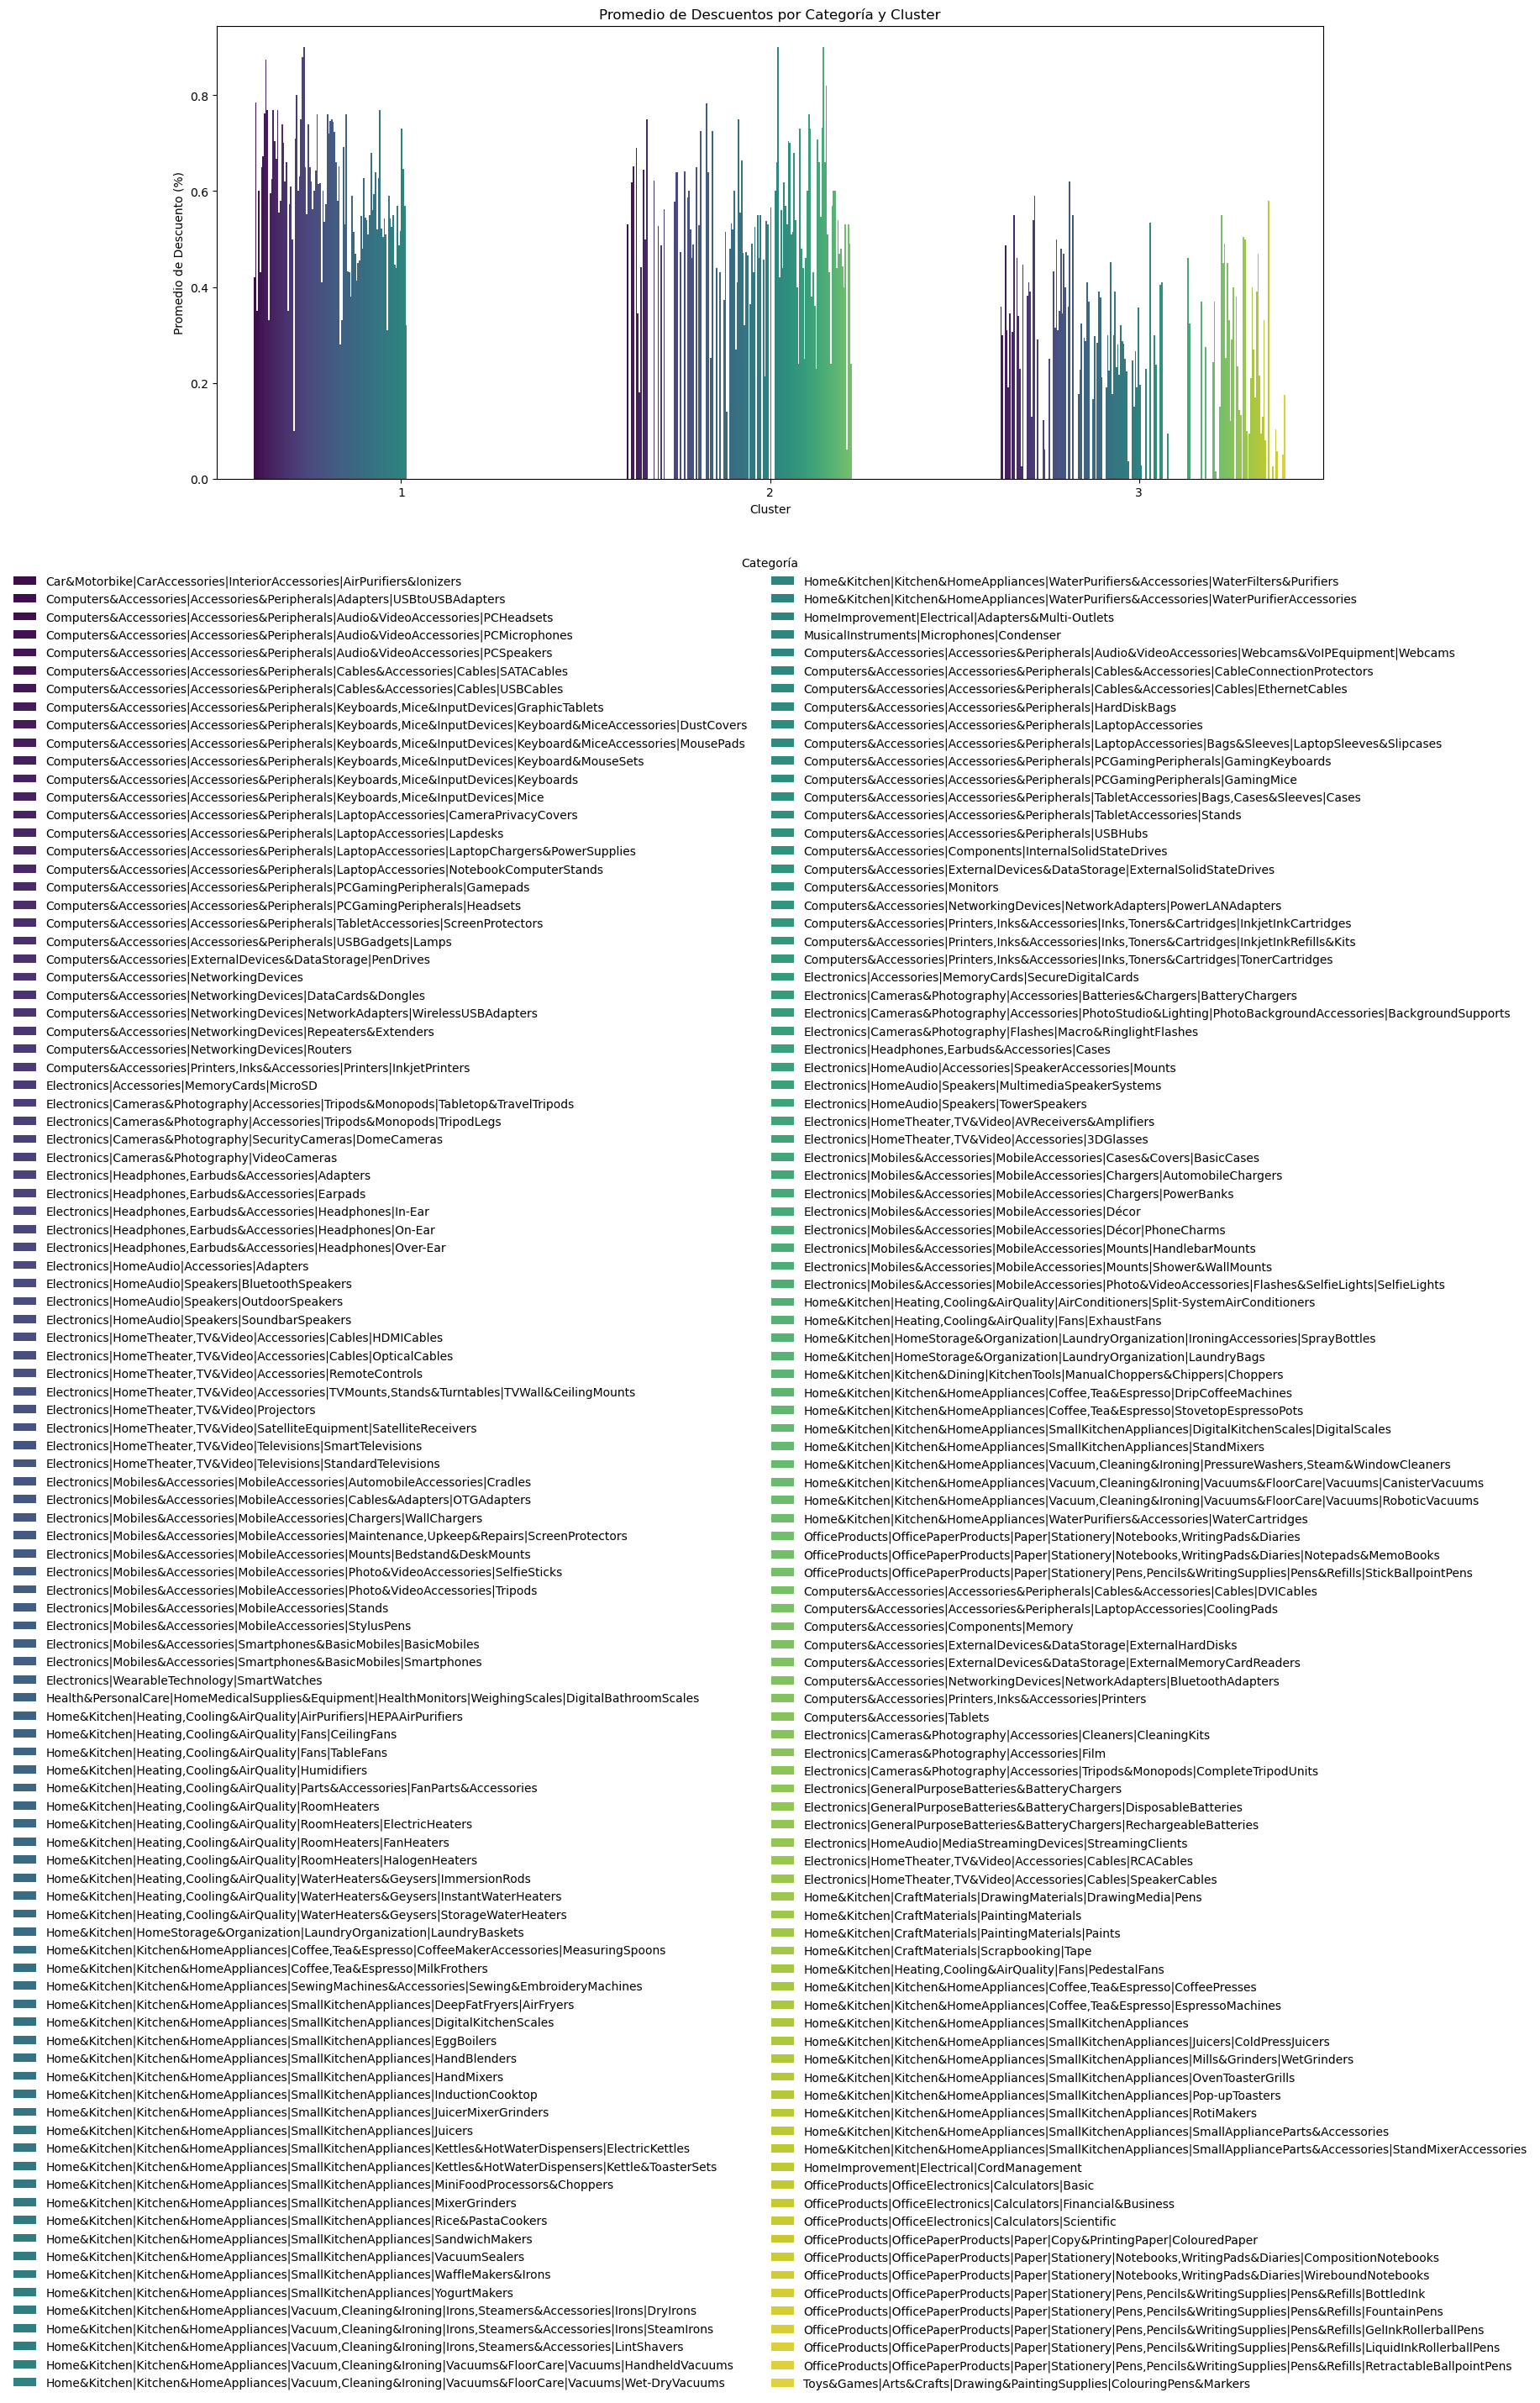

In [96]:
plt.figure(figsize=(17, 7))
sns.barplot(data=cluster_category_summary, x='cluster', y='discount_percentage', hue='category', palette='viridis')
plt.title('Promedio de Descuentos por Categoría y Cluster')
plt.xlabel('Cluster')
plt.ylabel('Promedio de Descuento (%)')
plt.legend(title='Categoría', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2, frameon=False)
plt.show()

---
# <center> Revisión de Datos Limpios para los modelos de predicción
---

- Valores Nulos
- Valores Infinitos
- Datos Duplicados

In [97]:
print(df_copy[['discount_percentage', 'sentiment', 'category', 'rating']].isnull().sum())

discount_percentage    0
sentiment              0
category               0
rating                 0
dtype: int64


In [98]:
print((df_copy[['discount_percentage', 'sentiment', 'rating']] == float('inf')).sum())
print((df_copy[['discount_percentage', 'sentiment', 'rating']] == float('-inf')).sum())

discount_percentage    0
sentiment              0
rating                 0
dtype: int64
discount_percentage    0
sentiment              0
rating                 0
dtype: int64


In [99]:
# Revision y eliminacion de datos duplicados
print(df_copy.duplicated().sum())
df_copy = df_copy.drop_duplicates()

66


In [100]:
# Verificamos la eliminación de duplicados
print(df_copy.duplicated().sum())

0


In [101]:
scaler = MinMaxScaler()
df_copy[['discount_percentage', 'sentiment']] = scaler.fit_transform(df_copy[['discount_percentage', 'sentiment']])

In [102]:
scaler = StandardScaler()
df_copy[['discount_percentage', 'sentiment']] = scaler.fit_transform(df_copy[['discount_percentage', 'sentiment']])

In [103]:
df_copy.head(-5)

product_name  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     Sounce Fast Phone Charging Cable & Data Sync U...   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...                                                 ...   
1452  KNOWZA Electric Handheld Milk Wand Mixer Froth...   
1453               Usha Hc 812 T Thermo Fan Room Heater   
1454  akiara - Makes life easy Mini Sewing Machine f...   
1455  USHA 1212 PTC with Adjustable Thermostat Fan H...   
1456  4 in 1 Handheld Electric Vegetable Cutter Set,...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...            399.00   
1     Computers&Accessories|Accessories&Peripherals|...            199.00   
2     Computers&Accessories|Accessories&Peripherals|...            199.00   
3     Computers&Accessories|Accessories&Peripherals|...            329.00   
4     Computers&Accessories|Accessories&Peripherals|...            154.00   
...                                                 ...               ...   
1452  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            426.00   
1453  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           2320.00   
1454  Home&Kitchen|Kitchen&HomeAppliances|SewingMach...           1563.00   
1455  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           3487.77   
1456  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            498.00   

      actual_price  discount_percentage  rating  rating_count  \
0           1099.0             0.764831     4.2         24269   
1            349.0            -0.205941     4.0         43994   
2           1899.0             1.966739     3.9          7928   
3            699.0             0.256332     4.2         94363   
4            399.0             0.626149     4.2         16905   
...            ...                  ...     ...           ...   
1452         999.0             0.441240     4.1           222   
1453        3290.0            -0.853122     3.8           195   
1454        3098.0             0.117650     3.5          2283   
1455        4990.0            -0.806894     4.1          1127   
1456        1200.0             0.533695     3.2           113   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1452  Make Rich & Creamy Froth In Seconds, Then Say ...   
1453               Heat convector|Warranty for one year   
1454  PORTABLE MINI SEWING MACHINE with threads and ...   
1455  Meant for Spot Heating|Room Size: Upto 15 sq f...   
1456  { 4 in 1 multi-function Electric Vegetable Cut...   

                                              user_name  \
0     Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1     ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2     Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3     Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4     rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   
...                                                 ...   
1452  Deepak B.,Azhar s.,Yogesh Rajput,Amit V.,Manee...   
1453  Sumit kumar,sunil,Mahima & Company,GAURAV KUMA...   
1454  Vaishnavi,Paramesh,Kirti Gupta,Mousumi Ganguli...   
1455  Manoj Kumar,Arun Thottakathu Prasannakumar,son...   
1456  Ashish,Kavita J.,Sundar,Tessy S.,saurabh manro...   

                                           review_title  \
0     Satisfied,Charging is really fast,Value for mo...   
1     A Good Braided Cable for Your Type C Device,Go...   
2     Good speed for earlier vers

# <center> Usaremos el encode Target Encoding
* ya que ya que es la opcion mas poderosa y estamos buscando maximizar la precisión y del modelo de predicción de ratings, solo debemos tener cuidado del sobreajuste por lo cual se realizan tecnicas de validacion cruzada

In [104]:
# Configuración de Target Encoder
target_enc = ce.TargetEncoder(cols=['category'])

# Preparar los datos para codificación
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creamos una copia del DataFrame para evitar la fuga de datos
df_encoded = df_copy.copy()


# Inicializar la columna codificada como float
df_encoded['category_encoded'] = np.zeros(df_encoded.shape[0], dtype=float)

# Aplicar Target Encoding con validación cruzada
for train_idx, test_idx in kf.split(df_encoded):
    train_data, test_data = df_encoded.iloc[train_idx], df_encoded.iloc[test_idx]
    target_enc.fit(train_data['category'], train_data['rating'])
    df_encoded.iloc[test_idx, df_encoded.columns.get_loc('category_encoded')] = target_enc.transform(test_data['category'])

# Verificar el resultado de la codificación
print(df_encoded.head())

                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0             0.764831     4.2         24269   
1         349.0            -0.205941     4.0         43994   
2        1899.0             1.96

In [105]:
# Normalizamos las características numéricas en df_encoded
features_to_scale = ['discount_percentage', 'sentiment', 'category_encoded']
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [106]:
# Separar características y variable objetivo
X = df_encoded[['discount_percentage', 'sentiment', 'category_encoded']]
y = df_encoded['rating']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [107]:
# Entrenamiento del modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 0.260152726510088


In [108]:
# Entrenamiento del modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.26978103984615043


In [109]:
# Entrenamiento del modelo
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_gb = gb_model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

print(f'Gradient Boosting RMSE: {rmse_gb}')

Gradient Boosting RMSE: 0.2632602302935096


## <center> Resultados
---

In [110]:
print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Gradient Boosting RMSE: {rmse_gb}')

Linear Regression RMSE: 0.260152726510088
Random Forest RMSE: 0.26978103984615043
Gradient Boosting RMSE: 0.2632602302935096


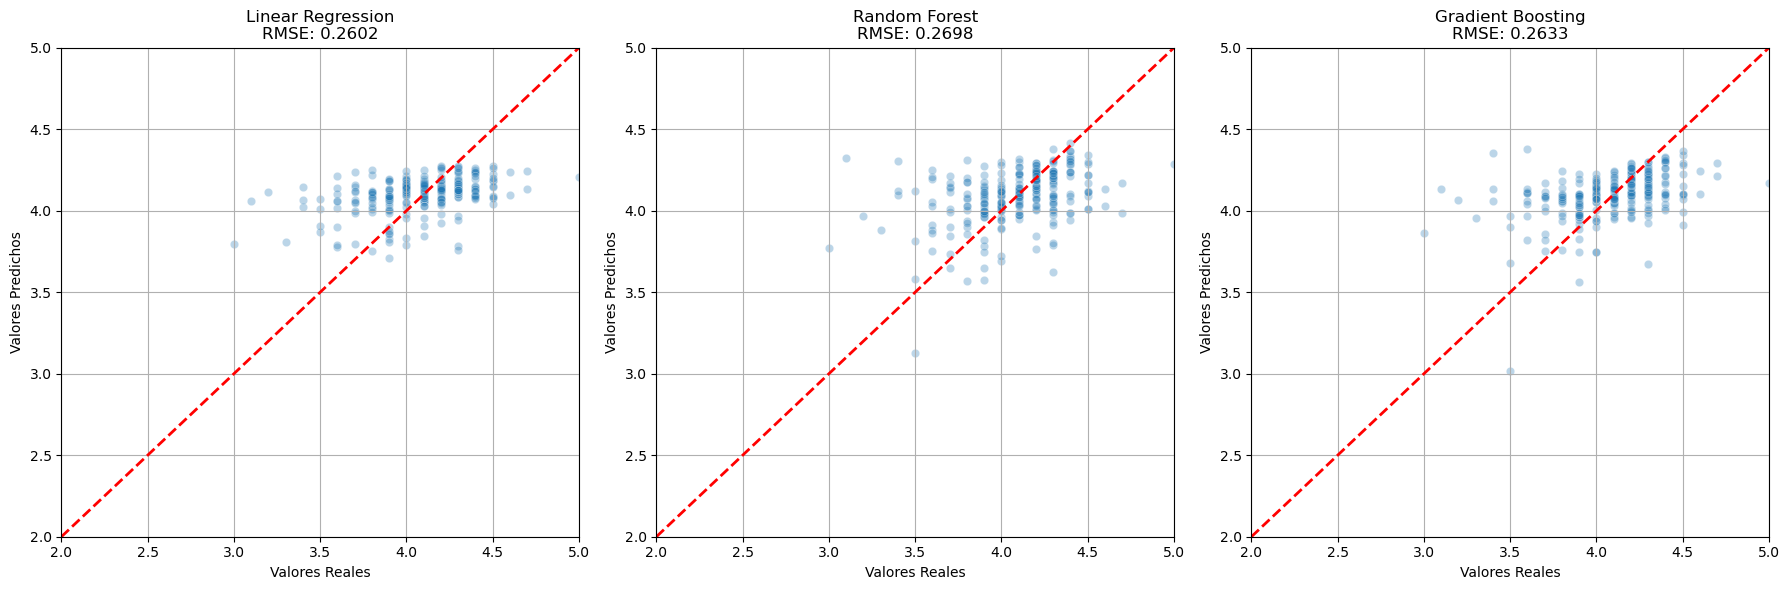

In [111]:
# Comparar valores reales y predichos
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.3, edgecolors='w', linewidth=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Linear Regression\nRMSE: {rmse_lr:.4f}')
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.3, edgecolors='w', linewidth=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Random Forest\nRMSE: {rmse_rf:.4f}')
plt.grid(True)

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.3, edgecolors='w', linewidth=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Gradient Boosting\nRMSE: {rmse_gb:.4f}')
plt.grid(True)

plt.tight_layout()
plt.show()

#### <center> El modelo que mejor se ajusta es el que tiene el RMSE (Root Mean Squared Error) más bajo. Un RMSE más bajo indica que el modelo está prediciendo los ratings con mayor precisión. En este caso el mejor modelo es el **Linear Regression**

---
# <center> Coeficientes del modelo de Regresión Lineal 

#### - Con esto vamos a entender qué variables tienen mayor impacto en la predicción de los ratings

In [112]:
# Entrenamos el modelo
model = LinearRegression()
model.fit(X, y)

# Obtenemos los coeficientes
coefficients = pd.DataFrame({
    'Feature': ['discount_percentage', 'sentiment', 'category_encoded'],
    'Coefficient': model.coef_
})

print(coefficients)

               Feature  Coefficient
0  discount_percentage    -0.040217
1            sentiment     0.007119
2     category_encoded     0.091731


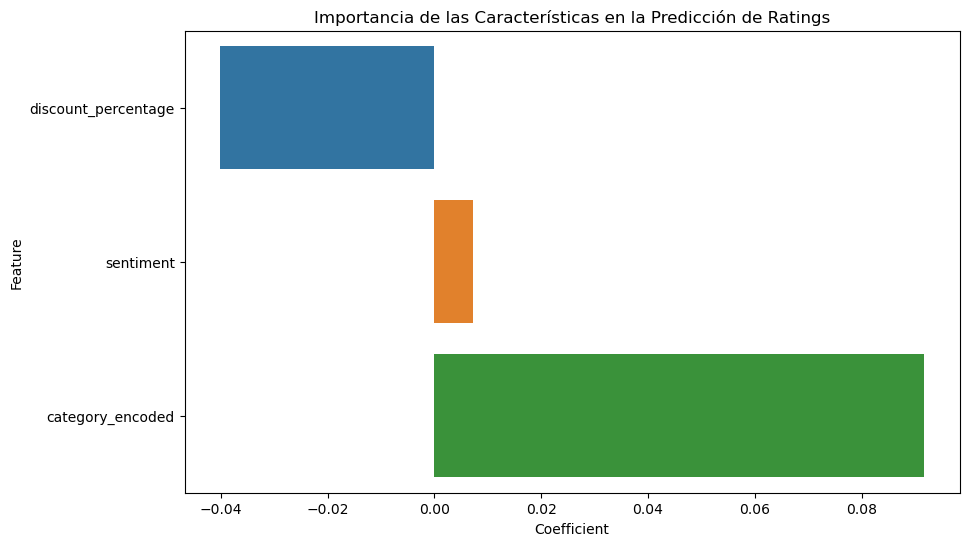

In [113]:
# Gráfico de barras de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Importancia de las Características en la Predicción de Ratings')
plt.show()

#### La longitud de las barras representa la magnitud de los coeficientes. Cuanto más larga sea la barra, mayor será la influencia de esa característica en la predicción del rating.
---
- **category_encoded:** Tiene la barra más larga y positiva, indicando que es la característica más influyente y está positivamente asociada con los ratings.
- **sentiment:** Tiene una barra corta y positiva, indicando que tiene un impacto positivo menor en los ratings.
- **discount_percentage:** Tiene una barra más corta y negativa, indicando que tiene un impacto negativo menor en los ratings.

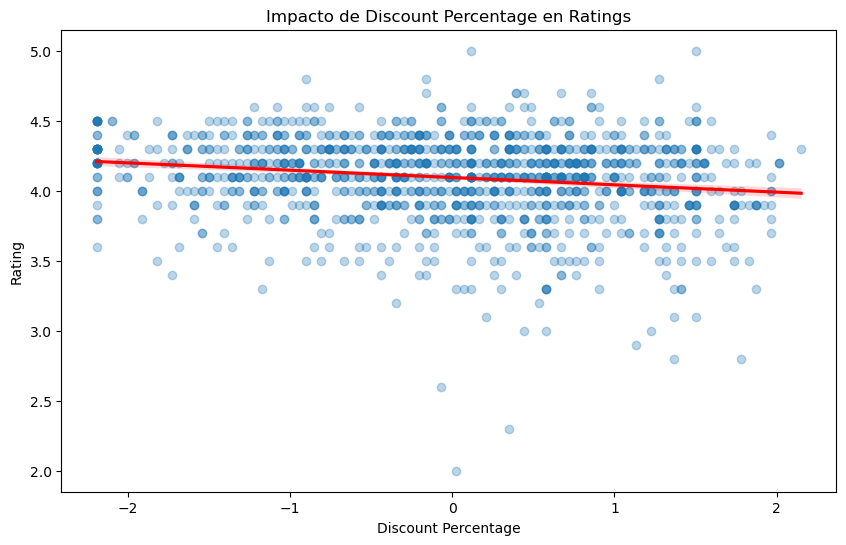

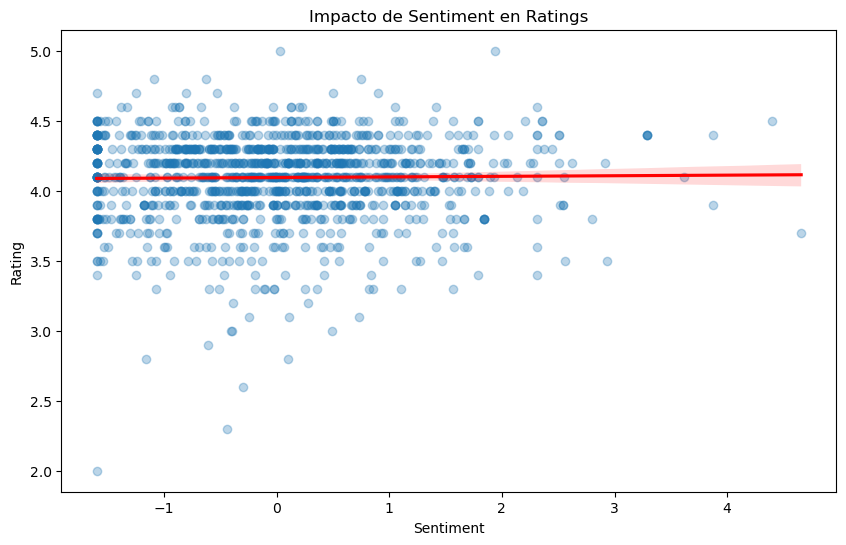

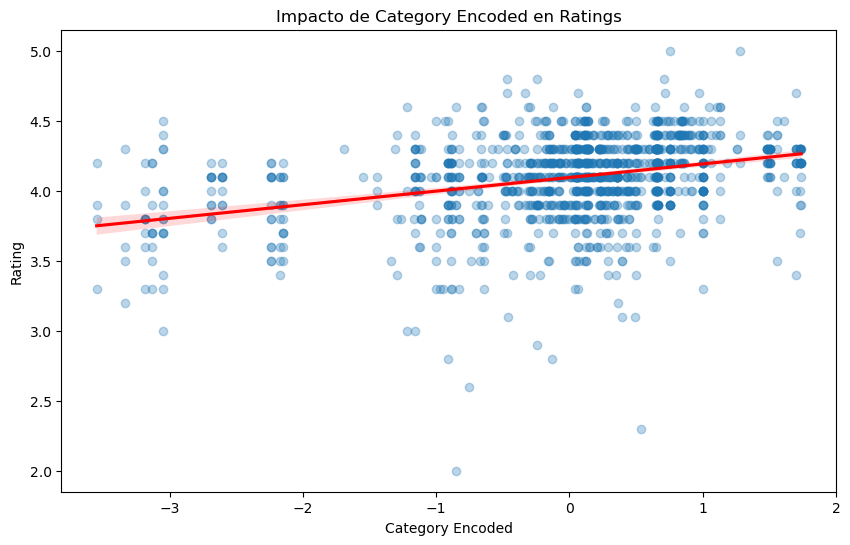

In [114]:
# Visualización del impacto de discount_percentage en los ratings con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=df_encoded, scatter_kws={'alpha':0.3}, line_kws={"color":"r"})
plt.title('Impacto de Discount Percentage en Ratings')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

# Visualización del impacto de sentiment en los ratings con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='sentiment', y='rating', data=df_encoded, scatter_kws={'alpha':0.3}, line_kws={"color":"r"})
plt.title('Impacto de Sentiment en Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

# Visualización del impacto de category_encoded en los ratings con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='category_encoded', y='rating', data=df_encoded, scatter_kws={'alpha':0.3}, line_kws={"color":"r"})
plt.title('Impacto de Category Encoded en Ratings')
plt.xlabel('Category Encoded')
plt.ylabel('Rating')
plt.show()

## Conclusiones


- muestran la relación lineal entre las variables independientes (porcentaje de descuento, sentimiento, categoría codificada) y los ratings.
- La línea de mejor ajuste (línea roja) indica la tendencia general: **si es ascendente, la relación es positiva; si es descendente, la relación es negativa.**
- ---
## Coeficientes
#### **Discount_percentage (-0.040217):**

- **Interpretación:** Este coeficiente negativo indica que a medida que aumenta el porcentaje de descuento, el rating del producto tiende a disminuir, manteniendo constantes las otras variables.
- **Magnitud:** Por cada incremento de una unidad en el porcentaje de descuento, el rating del producto disminuye en aproximadamente 0.04 unidades.
- **Posible Explicación:** Un descuento mayor podría estar asociado a productos que tienen alguna deficiencia o que no son tan populares, lo que puede resultar en calificaciones más bajas.

#### **Sentiment (0.007119):**

- **Interpretación:** Este coeficiente positivo sugiere que a medida que el sentimiento (polaridad del análisis de sentimiento) aumenta, el rating del producto también tiende a aumentar.
- **Magnitud:** Por cada incremento de una unidad en el sentimiento, el rating del producto aumenta en aproximadamente 0.007 unidades.
- **Posible Explicación:** Un sentimiento más positivo en las reseñas está asociado con mejores ratings, lo cual es intuitivo ya que reseñas positivas suelen acompañarse de ratings altos.

#### **Category_encoded (0.091731):**

- **Interpretación:** Este coeficiente positivo implica que a medida que la categoría codificada aumenta, el rating del producto también tiende a aumentar.
- **Magnitud:** Por cada incremento de una unidad en la categoría codificada, el rating del producto aumenta en aproximadamente 0.092 unidades.
- **Posible Explicación:** Diferentes categorías de productos pueden tener inherentemente diferentes niveles de popularidad y calidad percibida, lo cual se refleja en los ratings.

## <center> Guardado de Dataset e importación a AWS S3
---

In [57]:
# Guardar el dataset actualizado en un archivo CSV
df_copy.to_csv('dataset_actualizado.csv', index=False)

In [60]:
# Configurar las credenciales de AWS
s3 = boto3.client('s3',
                  aws_access_key_id='Censored',
                  aws_secret_access_key='Censored',
                  region_name='us-east-2')

# Nombre del bucket y del archivo
bucket_name = 'project-data-analysis-amazon-reviews'
file_name = 'dataset_actualizado.csv'
s3_file_name = 'dataset_actualizado.csv'

# Subir el archivo a S3
s3.upload_file(file_name, bucket_name, s3_file_name)
print("Archivo subido a S3 exitosamente.")

Archivo subido a S3 exitosamente.
